# `problem statement`
##  <font color="red">Finding the `decision surface` of data which is created by opencv library  </font>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,BatchNormalization
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
#  reading the csv file
df = pd.read_csv("open dataset 2.csvp")
df

,Unnamed: 0,0,1,2
0,0,24,24,0
1,1,24,41,0
2,2,48,33,0
3,3,40,23,0
4,4,24,58,0
...,...,...,...,...
358,358,12,235,1
359,359,14,220,1
360,360,15,195,1
361,361,15,186,1


In [106]:
# removing unwamted columns
df.drop("Unnamed: 0",inplace=True,axis=1)
df

,0,1,2
0,24,24,0
1,24,41,0
2,48,33,0
3,40,23,0
4,24,58,0
...,...,...,...
358,12,235,1
359,14,220,1
360,15,195,1
361,15,186,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       363 non-null    int64
 1   1       363 non-null    int64
 2   2       363 non-null    int64
dtypes: int64(3)
memory usage: 8.6 KB


In [108]:
# checking for the duplicate values in dataframe
df.duplicated().sum()

2

In [110]:
# removing duplicate values fronm the data frame
df.drop_duplicates(inplace=True)

In [111]:
# rechecking duplicates after deleting
df.duplicated().sum()

0

In [112]:
# checking the null values
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,361.0,115.038781,75.680385,6.0,45.0,104.0,190.0,245.0
1,361.0,120.664820,79.095871,8.0,42.0,114.0,205.0,248.0
2,361.0,0.484765,0.500461,0.0,0.0,0.0,1.0,1.0


# observations
- The mean and median both not at same ,so there may be outliers in the data

# <font color="purple"> Exploratory data analysis </font>

In [114]:
from scipy import stats

In [115]:
# boxplot and hist plot  kde plot
def uni_visual(df):
  for i in df:
    print("*"*15,i,"*"*15)
    sns.boxplot(x=i,data=df)
    plt.title(f"boxplot of{i}")
    plt.show()


    # histogram
    print("*"*15,i,"*"*15)
    df[i].plot(kind="hist")
    plt.title(f"histogram  of {i}")
    plt.show()


    # density plot
    print("*"*15,i,"*"*15)
    df[i].plot(kind="kde")
    plt.title(f"density plot of {i}")
    plt.show()

    # qq plot normal distribution
    print("*"*15,i,"*"*15)
    stats.probplot(df[i],dist="norm",plot=plt)
    plt.title(f"normal distribution of {i}")
    plt.grid()
    plt.show()

    # qq plot uniform distribution
    print("*"*15,i,"*"*15)
    stats.probplot(df[i],dist="uniform",plot=plt)
    plt.title(f"uniform distribution of {i}")
    plt.grid()
    plt.show()

    dec_ = df.describe()
    print("describe" ,dec_)


    skew_ = df.skew()
    print("skewness",skew_)

    kurt_ = df.kurt()
    print("skewness",kurt_)


*************** 0 ***************


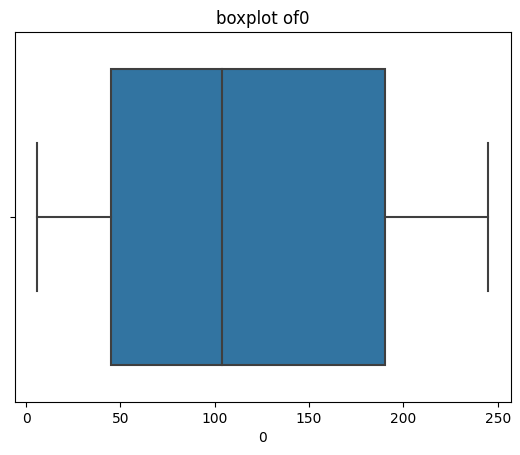

*************** 0 ***************


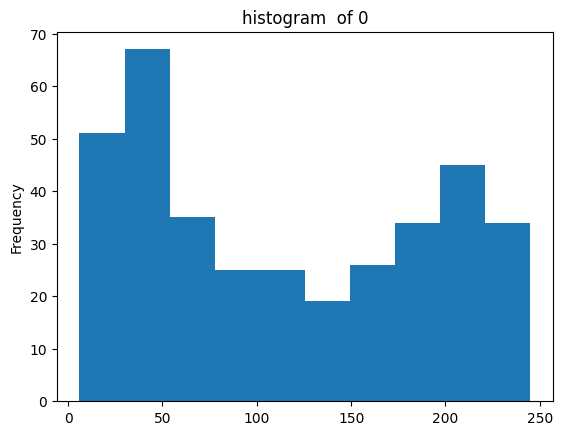

*************** 0 ***************


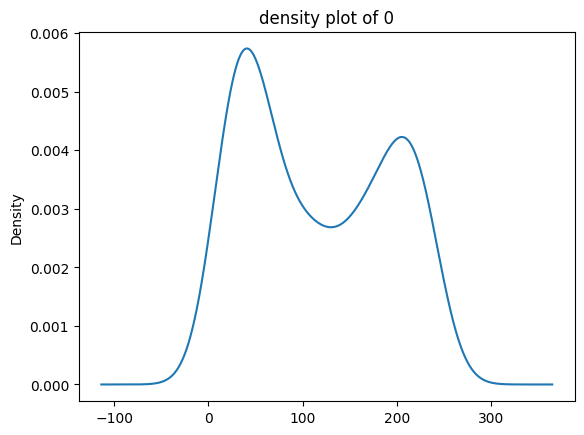

*************** 0 ***************


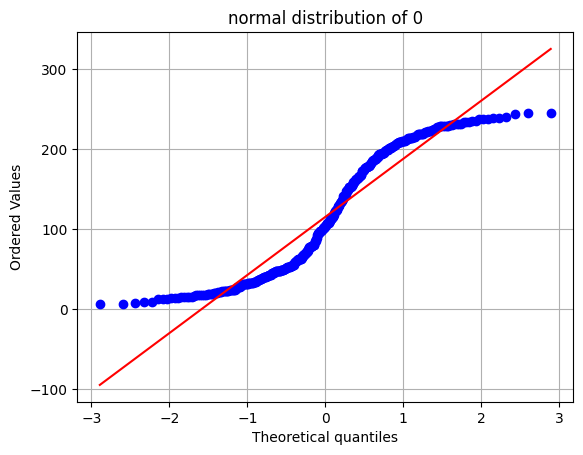

*************** 0 ***************


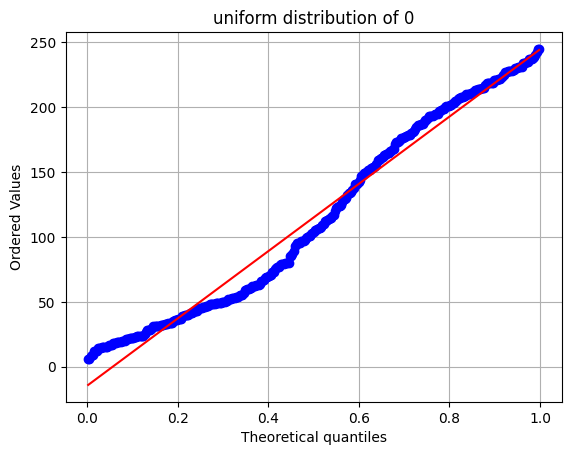

describe                 0           1           2
count  361.000000  361.000000  361.000000
mean   115.038781  120.664820    0.484765
std     75.680385   79.095871    0.500461
min      6.000000    8.000000    0.000000
25%     45.000000   42.000000    0.000000
50%    104.000000  114.000000    0.000000
75%    190.000000  205.000000    1.000000
max    245.000000  248.000000    1.000000
skewness 0    0.197588
1    0.155969
2    0.061225
dtype: float64
skewness 0   -1.469659
1   -1.492795
2   -2.007404
dtype: float64
*************** 1 ***************


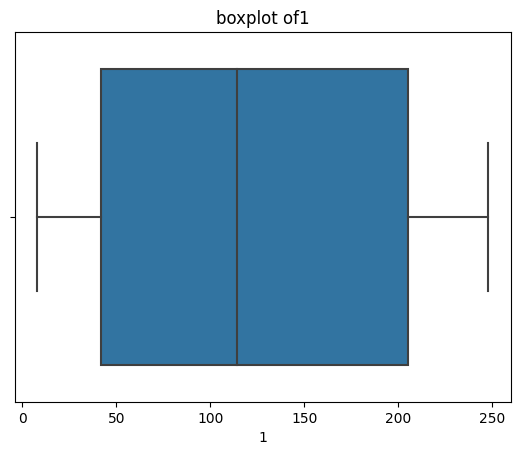

*************** 1 ***************


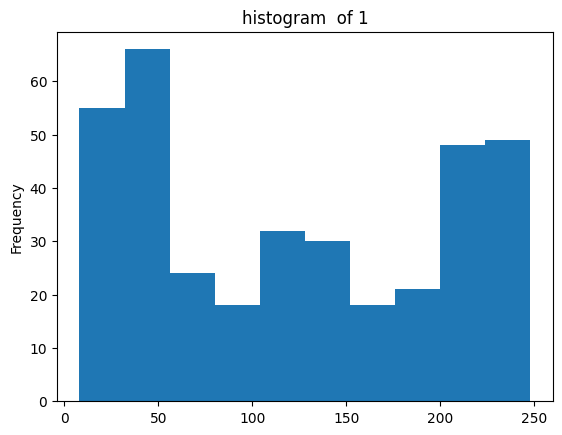

*************** 1 ***************


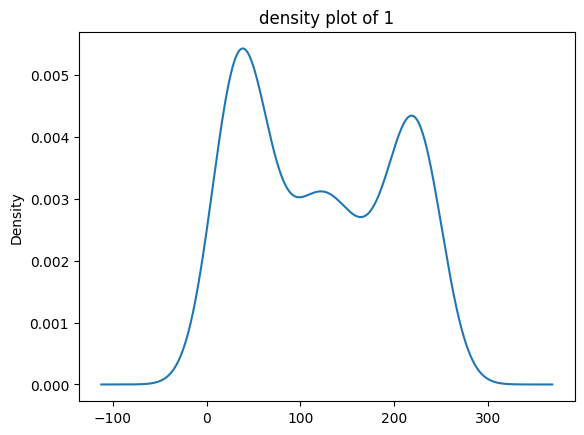

*************** 1 ***************


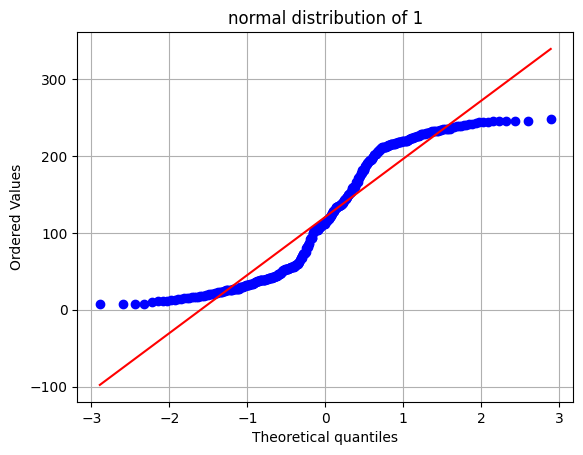

*************** 1 ***************


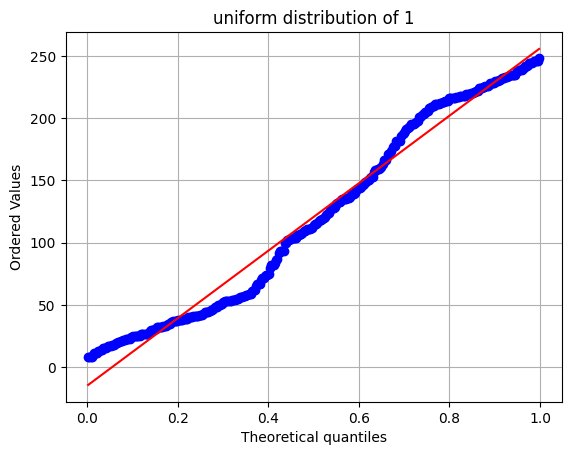

describe                 0           1           2
count  361.000000  361.000000  361.000000
mean   115.038781  120.664820    0.484765
std     75.680385   79.095871    0.500461
min      6.000000    8.000000    0.000000
25%     45.000000   42.000000    0.000000
50%    104.000000  114.000000    0.000000
75%    190.000000  205.000000    1.000000
max    245.000000  248.000000    1.000000
skewness 0    0.197588
1    0.155969
2    0.061225
dtype: float64
skewness 0   -1.469659
1   -1.492795
2   -2.007404
dtype: float64
*************** 2 ***************


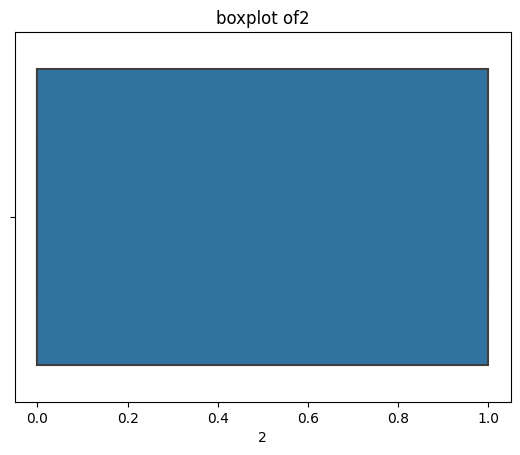

*************** 2 ***************


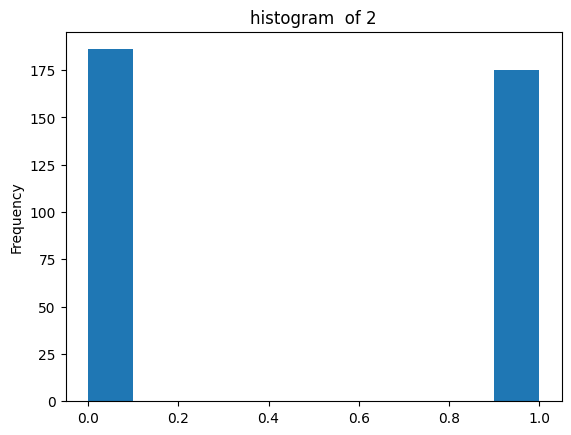

*************** 2 ***************


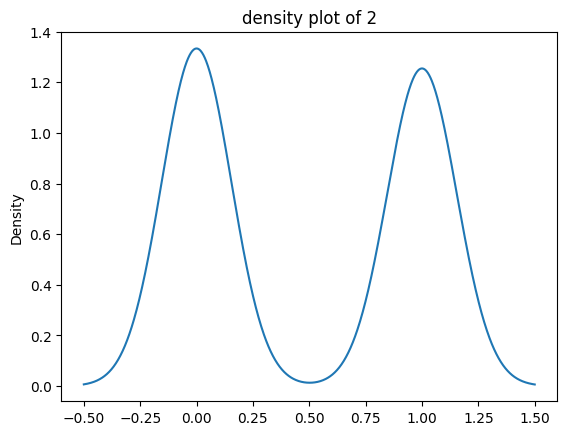

*************** 2 ***************


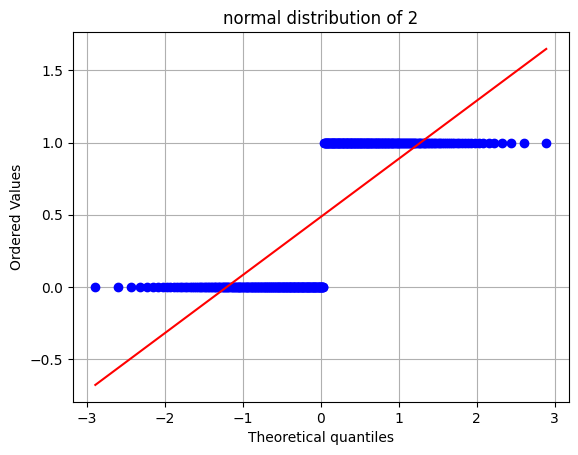

*************** 2 ***************


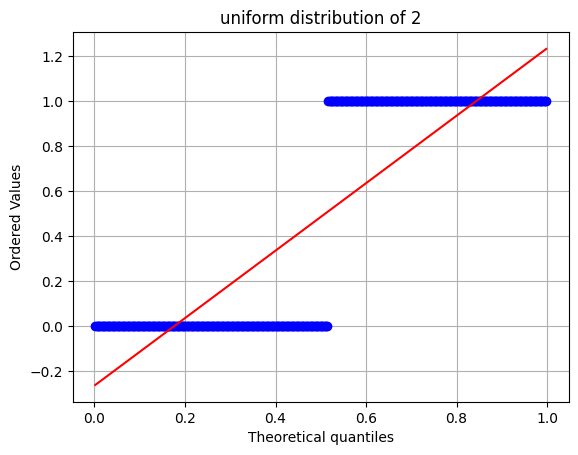

describe                 0           1           2
count  361.000000  361.000000  361.000000
mean   115.038781  120.664820    0.484765
std     75.680385   79.095871    0.500461
min      6.000000    8.000000    0.000000
25%     45.000000   42.000000    0.000000
50%    104.000000  114.000000    0.000000
75%    190.000000  205.000000    1.000000
max    245.000000  248.000000    1.000000
skewness 0    0.197588
1    0.155969
2    0.061225
dtype: float64
skewness 0   -1.469659
1   -1.492795
2   -2.007404
dtype: float64


In [116]:
uni_visual(df)

# observations
- There are no outliers in the data
- The 0 column has uniform distribution

# building the model for prediction

In [119]:
# identifing inputs and output
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [120]:
x

,0,1
0,24,24
1,24,41
2,48,33
3,40,23
4,24,58
...,...,...
358,12,235
359,14,220
360,15,195
361,15,186


In [121]:
# what are unique values in output feature
y.unique()

array([0, 1])

In [122]:
# checking the classes frquency counts
y.value_counts()

0    186
1    175
Name: 2, dtype: int64

# observation
- The data is slitely imbalanced but fine

In [173]:
# spliting the data train and test
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [174]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(288, 2) (288,)
(73, 2) (73,)


In [175]:
x_test.shape

(73, 2)

In [176]:
# preprocessing of train data
std =StandardScaler()
x_train =std.fit_transform(x_train)


In [177]:
# preprocessing of test data
x_test =std.transform(x_test)

In [178]:
# creating the neural network
model = Sequential()
model.add(Dense(8,activation="tanh",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02),input_dim=2))
model.add(Dense(6,activation="tanh",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

model.add(Dense(4,activation="tanh",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

model.add(Dense(1,activation="sigmoid",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

In [179]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 24        
                                                                 
 dense_25 (Dense)            (None, 6)                 54        
                                                                 
 dense_26 (Dense)            (None, 4)                 28        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [180]:
model.get_weights()

[array([[ 0.6221919 ,  0.60530674,  0.39990687, -0.73005897, -0.62225264,
          0.47129107, -0.21720082,  0.7682347 ],
        [-0.08711916,  0.45514214,  0.04011172, -0.10600805,  0.7325287 ,
         -0.69140744, -0.04835635,  0.4897231 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.23087153, -0.37243816,  0.5114641 ,  0.09414172,  0.02569121,
          0.55667746],
        [ 0.25654334,  0.57616556, -0.53673214,  0.47364235,  0.19707626,
         -0.34420723],
        [ 0.2652042 , -0.44057605, -0.00719082, -0.32831654, -0.53597534,
          0.34182215],
        [ 0.2532844 ,  0.09609228, -0.5120822 ,  0.5048622 , -0.21311459,
          0.6030834 ],
        [ 0.32119364,  0.11862153,  0.3761723 ,  0.20338714,  0.06280911,
         -0.44272906],
        [-0.6517384 , -0.5208132 ,  0.47246695, -0.1320622 , -0.52714235,
         -0.13370496],
        [-0.5154292 ,  0.6290591 ,  0.31978995, -0.03615242, -0.5154183 ,
         -0.5609468 ],
 

In [181]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
History=model.fit(x_train,y_train,batch_size=10,validation_split=0.1,epochs=20)

Epoch 1/20
26/26 [==============================] - 1s 12ms/step - loss: 1.4454 - accuracy: 0.1699 - val_loss: 1.3694 - val_accuracy: 0.8966
Epoch 2/20
26/26 [==============================] - 0s 6ms/step - loss: 1.3248 - accuracy: 0.9498 - val_loss: 1.2607 - val_accuracy: 1.0000
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 1.2303 - accuracy: 1.0000 - val_loss: 1.1766 - val_accuracy: 1.0000
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 1.1564 - accuracy: 0.9961 - val_loss: 1.1104 - val_accuracy: 1.0000
Epoch 5/20
26/26 [==============================] - 0s 4ms/step - loss: 1.0983 - accuracy: 0.9961 - val_loss: 1.0584 - val_accuracy: 1.0000
Epoch 6/20
26/26 [==============================] - 0s 4ms/step - loss: 1.0519 - accuracy: 0.9961 - val_loss: 1.0152 - val_accuracy: 1.0000
Epoch 7/20
26/26 [==============================] - 0s 4ms/step - loss: 1.0122 - accuracy: 0.9961 - val_loss: 0.9775 - val_accuracy: 1.0000
Epoch 8/20
26/26 [=

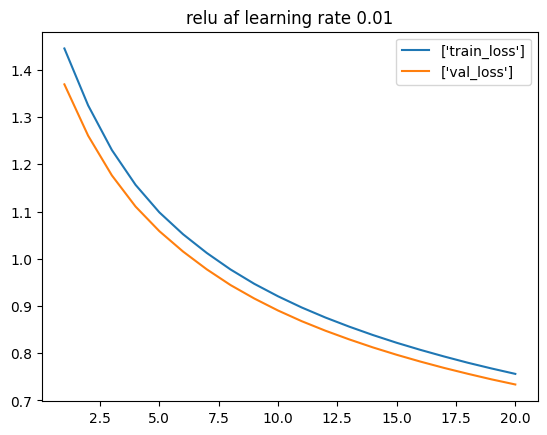

In [182]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("relu af learning rate 0.01")
plt.legend()
plt.show()

In [183]:
History.history['loss']

[1.4453657865524292,
 1.3248487710952759,
 1.2303175926208496,
 1.1563862562179565,
 1.0983039140701294,
 1.0518670082092285,
 1.012211561203003,
 0.9772544503211975,
 0.9468915462493896,
 0.9204700589179993,
 0.8967183232307434,
 0.8754181265830994,
 0.8561591506004333,
 0.8383674621582031,
 0.821980893611908,
 0.8069694638252258,
 0.7929171323776245,
 0.7796666622161865,
 0.76751309633255,
 0.7560750246047974]

In [184]:
# predictons of test data
pred_x_p =model.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [185]:
pred_x_p # these are probalities

array([[0.9077426 ],
       [0.12052026],
       [0.09351833],
       [0.3481723 ],
       [0.20095594],
       [0.32836625],
       [0.9113322 ],
       [0.84624684],
       [0.907258  ],
       [0.8850917 ],
       [0.09548716],
       [0.13842444],
       [0.08925149],
       [0.10440013],
       [0.08892483],
       [0.9066745 ],
       [0.10356882],
       [0.30210182],
       [0.8745775 ],
       [0.84731936],
       [0.89171803],
       [0.09874208],
       [0.24733421],
       [0.08855879],
       [0.1127615 ],
       [0.10380039],
       [0.10751695],
       [0.9115093 ],
       [0.8875022 ],
       [0.9101377 ],
       [0.12266726],
       [0.08718181],
       [0.09092452],
       [0.10182451],
       [0.8751224 ],
       [0.8991213 ],
       [0.13446973],
       [0.9116833 ],
       [0.2993247 ],
       [0.6951234 ],
       [0.90682864],
       [0.14919363],
       [0.8860929 ],
       [0.26083708],
       [0.82280344],
       [0.90683657],
       [0.14907019],
       [0.844

In [186]:
y_test_pred = np.where(pred_x_p>=0.5,1,0)

In [187]:
y_test_pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [195]:
# importing evalution metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#print("accuary of twst data ",accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        37

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [196]:
accuracy_score(y_test,y_test_pred)

1.0

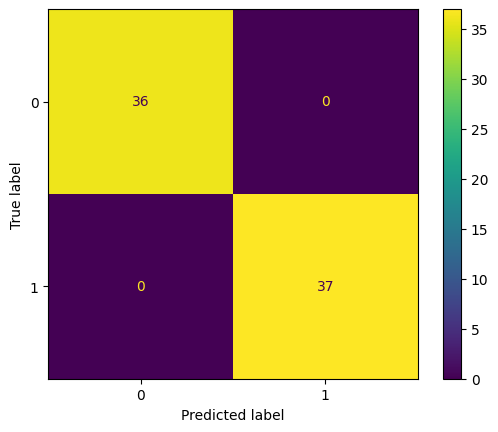

In [198]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
cm =confusion_matrix(y_test,y_test_pred)
p =ConfusionMatrixDisplay(cm)
p.plot()
plt.show()

In [190]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

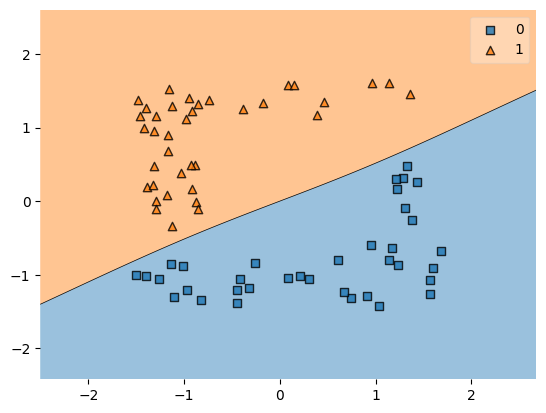

In [193]:
plot_decision_regions(x_test,y_test.values,clf=model)

In [102]:
type(x_test)

numpy.ndarray